In [19]:
df2

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Day,Time,CountryID
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,5504,United Kingdom,2010,12,1,08:26:00,0
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,5504,United Kingdom,2010,12,1,08:26:00,0
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,5504,United Kingdom,2010,12,1,08:26:00,0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,5504,United Kingdom,2010,12,1,08:26:00,0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,5504,United Kingdom,2010,12,1,08:26:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,334,France,2011,12,9,12:50:00,1
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,334,France,2011,12,9,12:50:00,1
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,334,France,2011,12,9,12:50:00,1
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,334,France,2011,12,9,12:50:00,1


Phase 4

Getting the itemnames into a separate df

In [50]:
transaction_data = df2.groupby(['BillNo', 'Date'])['Itemname'].apply(lambda x: ', '.join(x)).reset_index()
transaction_data.drop(columns=['BillNo', 'Date'], inplace=True)
items = transaction_data['Itemname'].str.split(', ', expand=True)
transaction_data = pd.concat([transaction_data, items], axis=1)
transaction_data = transaction_data.drop('Itemname', axis=1)

transaction_data.head()

                                 0                            1     \
0  WHITE HANGING HEART T-LIGHT HOLDER          WHITE METAL LANTERN   
1              HAND WARMER UNION JACK    HAND WARMER RED POLKA DOT   
2       ASSORTED COLOUR BIRD ORNAMENT    POPPY'S PLAYHOUSE BEDROOM   
3            JAM MAKING SET WITH JARS  RED COAT RACK PARIS FASHION   
4            BATH BUILDING BLOCK WORD                         None   

                             2                                    3     \
0  CREAM CUPID HEARTS COAT HANGER  KNITTED UNION FLAG HOT WATER BOTTLE   
1                            None                                 None   
2       POPPY'S PLAYHOUSE KITCHEN    FELTCRAFT PRINCESS CHARLOTTE DOLL   
3  YELLOW COAT RACK PARIS FASHION         BLUE COAT RACK PARIS FASHION   
4                            None                                 None   

                             4                                   5     \
0  RED WOOLLY HOTTIE WHITE HEART.        SET 7 BABUSHKA NESTI

One hot encoding

In [57]:
encoded_data = pd.get_dummies(transaction_data, prefix='', prefix_sep='').groupby(level=0, axis=1).max()

Getting the association rules

In [52]:
from mlxtend.frequent_patterns import apriori, association_rules

In [62]:
frequent_itemsets = apriori(encoded_data, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.55)

rules.head()

c:\Pytemp1\Myvenv1\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.021285,0.065285,0.011893,0.558753,8.558663,0.010504,2.118348,0.902366
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.021285,0.049359,0.013986,0.657074,13.312041,0.012935,2.772148,0.944995
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED),0.021285,0.052422,0.014496,0.681055,12.991774,0.013381,2.970978,0.943102
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.028636,0.049359,0.016844,0.588235,11.917392,0.015431,2.308699,0.943095
4,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.022204,0.049359,0.013731,0.618391,12.528329,0.012635,2.491137,0.941077


Visualizing the analysis

In [63]:
import seaborn as sns

Relationship between support, confidence and lift

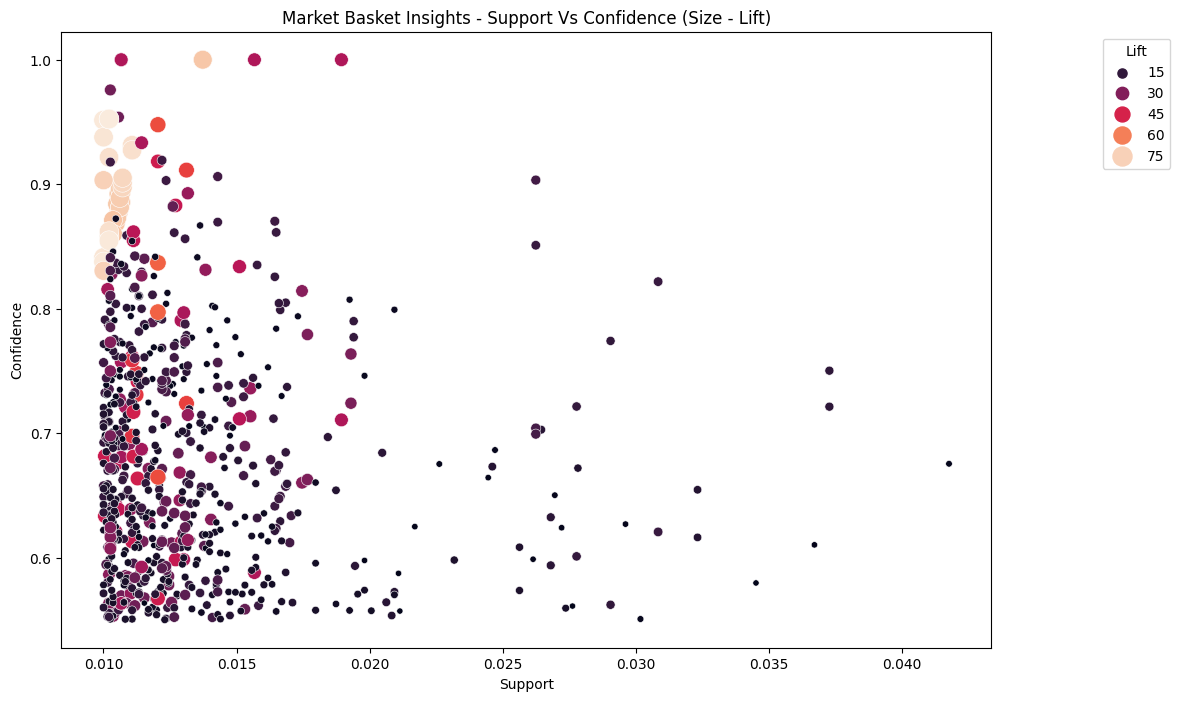

In [69]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="lift", palette="rocket", sizes=(20, 200))
plt.title('Market Basket Insights - Support Vs Confidence (Size - Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Adding interactive visualiaztions

In [70]:
import plotly.express as px

Relationship of support, confidence and lift from the association rules

In [72]:

rules['antecedents'] = rules['antecedents'].apply(list)
rules['consequents'] = rules['consequents'].apply(list)

fig = px.scatter(rules, x="support", y="confidence", size="lift",
                 color="lift", hover_name="consequents",
                 title='Market Basket Insights - Support Vs Confidence',)

fig.show()

Sunburst chart for association

In [98]:
rules['rule'] = rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str)
fig = px.sunburst(rules, path=['rule'], values='lift', 
                  title='Market Basket Insights - Sunburst Chart',
                  color='support', color_continuous_scale='tropic_r')

fig.update_layout(margin=dict(l=0, r=0, b=10, t=40),)
fig.show()